In [1]:
import matplotlib.pyplot as plt
import mltools as ml
import numpy as np
import pandas as pd

np.random.seed(0)
%matplotlib inline

#Loading data as csv file
df = pd.read_csv (r'data/winequality-white.csv', delimiter = ";")

# Removing duplicate data
df = df.drop_duplicates()

#Allocating first 11 columns to X
X = df.iloc[:,:11]
#Allocationg last column to Y
Y = df.iloc[:,11:12]

print(X.shape)
print(Y.shape)
print(X)
print(Y)

(3961, 11)
(3961, 1)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
6               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      

In [2]:
print(np.unique(df.iloc[:,11:12]))
#Finding class labels

[3 4 5 6 7 8 9]


In [3]:
df.info()
#11 features 1 label 4898 rows and 12 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [4]:
print(df.describe())
#Getting mean, std, min, percentiles and max value of each feature

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000         

In [5]:
data = df.to_numpy()
print(data)
print(data)

[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]
[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]


(array([3., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 1.6       ,  2.29230769,  2.98461538,  3.67692308,  4.36923077,
         5.06153846,  5.75384615,  6.44615385,  7.13846154,  7.83076923,
         8.52307692,  9.21538462,  9.90769231, 10.6       ]),
 <BarContainer object of 13 artists>)

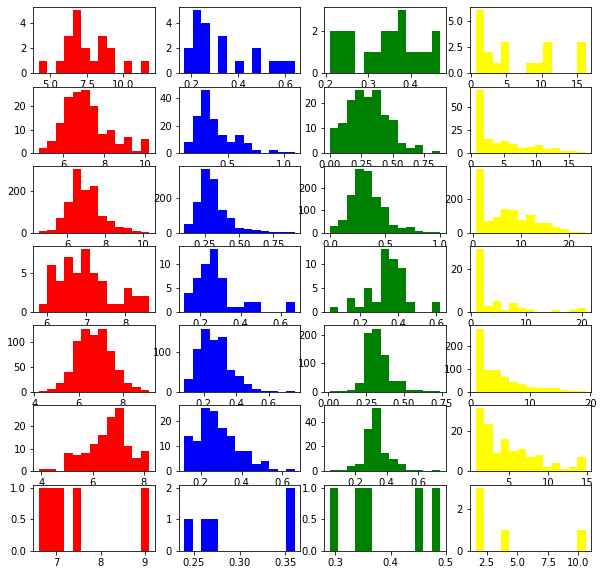

In [6]:
fig, axs = plt.subplots(7, 4, figsize=(10, 10))
mask = data[:, -1] == 3 
axs[0,0].hist(data[mask, 0], bins=13, color = 'red' ) 
axs[0,1].hist(data[mask, 1], bins=13, color = 'blue' )
axs[0,2].hist(data[mask, 2], bins=13, color = 'green')
axs[0,3].hist(data[mask, 3], bins=13, color = 'yellow' )
mask = data[:, -1] == 4
axs[1,0].hist(data[mask, 0], bins=13, color = 'red' ) 
axs[1,1].hist(data[mask, 1], bins=13, color = 'blue' ) 
axs[1,2].hist(data[mask, 2], bins=13 , color = 'green') 
axs[1,3].hist(data[mask, 3], bins=13, color = 'yellow' ) 
mask = data[:, -1] == 5 
axs[2,0].hist(data[mask, 0], bins=13, color = 'red' ) 
axs[2,1].hist(data[mask, 1], bins=13, color = 'blue' ) 
axs[2,2].hist(data[mask, 2], bins=13 , color = 'green') 
axs[2,3].hist(data[mask, 3], bins=13, color = 'yellow' ) 
mask = data[:, -1] == 6 
axs[3,0].hist(data[0:49, 0], bins=13, color = 'red' ) 
axs[3,1].hist(data[0:49, 1], bins=13, color = 'blue' )
axs[3,2].hist(data[0:49, 2], bins=13, color = 'green')
axs[3,3].hist(data[0:49, 3], bins=13, color = 'yellow' )
mask = data[:, -1] == 7 
axs[4,0].hist(data[mask, 0], bins=13, color = 'red' ) 
axs[4,1].hist(data[mask, 1], bins=13, color = 'blue' ) 
axs[4,2].hist(data[mask, 2], bins=13 , color = 'green') 
axs[4,3].hist(data[mask, 3], bins=13, color = 'yellow' ) 
mask = data[:, -1] == 8 
axs[5,0].hist(data[mask, 0], bins=13, color = 'red' ) 
axs[5,1].hist(data[mask, 1], bins=13, color = 'blue' ) 
axs[5,2].hist(data[mask, 2], bins=13 , color = 'green') 
axs[5,3].hist(data[mask, 3], bins=13, color = 'yellow' ) 
mask = data[:, -1] == 9 
axs[6,0].hist(data[mask, 0], bins=13, color = 'red' ) 
axs[6,1].hist(data[mask, 1], bins=13, color = 'blue' ) 
axs[6,2].hist(data[mask, 2], bins=13 , color = 'green') 
axs[6,3].hist(data[mask, 3], bins=13, color = 'yellow' ) 


(array([2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.98965   , 0.99021538, 0.99078077, 0.99134615, 0.99191154,
        0.99247692, 0.99304231, 0.99360769, 0.99417308, 0.99473846,
        0.99530385, 0.99586923, 0.99643462, 0.997     ]),
 <BarContainer object of 13 artists>)

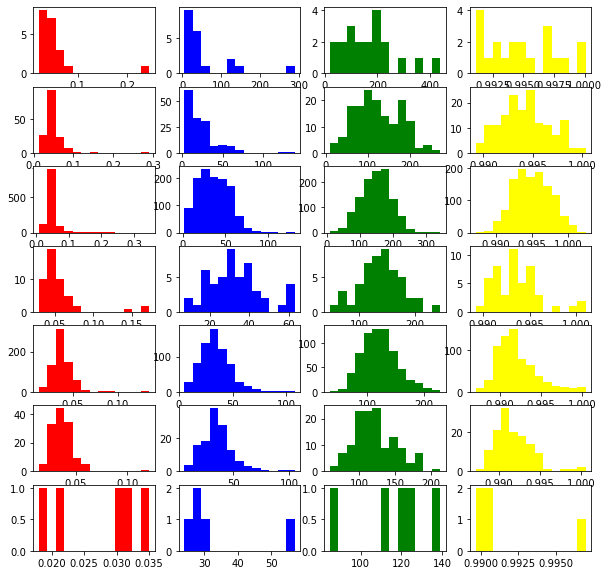

In [7]:
fig, axs = plt.subplots(7, 4, figsize=(10, 10))
mask = data[:, -1] == 3 
axs[0,0].hist(data[mask, 4], bins=13, color = 'red' ) 
axs[0,1].hist(data[mask, 5], bins=13, color = 'blue' )
axs[0,2].hist(data[mask, 6], bins=13, color = 'green')
axs[0,3].hist(data[mask, 7], bins=13, color = 'yellow' )
mask = data[:, -1] == 4
axs[1,0].hist(data[mask, 4], bins=13, color = 'red' ) 
axs[1,1].hist(data[mask, 5], bins=13, color = 'blue' ) 
axs[1,2].hist(data[mask, 6], bins=13 , color = 'green') 
axs[1,3].hist(data[mask, 7], bins=13, color = 'yellow' ) 
mask = data[:, -1] == 5 
axs[2,0].hist(data[mask, 4], bins=13, color = 'red' ) 
axs[2,1].hist(data[mask, 5], bins=13, color = 'blue' ) 
axs[2,2].hist(data[mask, 6], bins=13 , color = 'green') 
axs[2,3].hist(data[mask, 7], bins=13, color = 'yellow' ) 
mask = data[:, -1] == 6 
axs[3,0].hist(data[0:49, 4], bins=13, color = 'red' ) 
axs[3,1].hist(data[0:49, 5], bins=13, color = 'blue' )
axs[3,2].hist(data[0:49, 6], bins=13, color = 'green')
axs[3,3].hist(data[0:49, 7], bins=13, color = 'yellow' )
mask = data[:, -1] == 7 
axs[4,0].hist(data[mask, 4], bins=13, color = 'red' ) 
axs[4,1].hist(data[mask, 5], bins=13, color = 'blue' ) 
axs[4,2].hist(data[mask, 6], bins=13 , color = 'green') 
axs[4,3].hist(data[mask, 7], bins=13, color = 'yellow' ) 
mask = data[:, -1] == 8 
axs[5,0].hist(data[mask, 4], bins=13, color = 'red' ) 
axs[5,1].hist(data[mask, 5], bins=13, color = 'blue' ) 
axs[5,2].hist(data[mask, 6], bins=13 , color = 'green') 
axs[5,3].hist(data[mask, 7], bins=13, color = 'yellow' ) 
mask = data[:, -1] == 9 
axs[6,0].hist(data[mask, 4], bins=13, color = 'red' ) 
axs[6,1].hist(data[mask, 5], bins=13, color = 'blue' ) 
axs[6,2].hist(data[mask, 6], bins=13 , color = 'green') 
axs[6,3].hist(data[mask, 7], bins=13, color = 'yellow' ) 

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 1., 1.]),
 array([10.4       , 10.59230769, 10.78461538, 10.97692308, 11.16923077,
        11.36153846, 11.55384615, 11.74615385, 11.93846154, 12.13076923,
        12.32307692, 12.51538462, 12.70769231, 12.9       ]),
 <BarContainer object of 13 artists>)

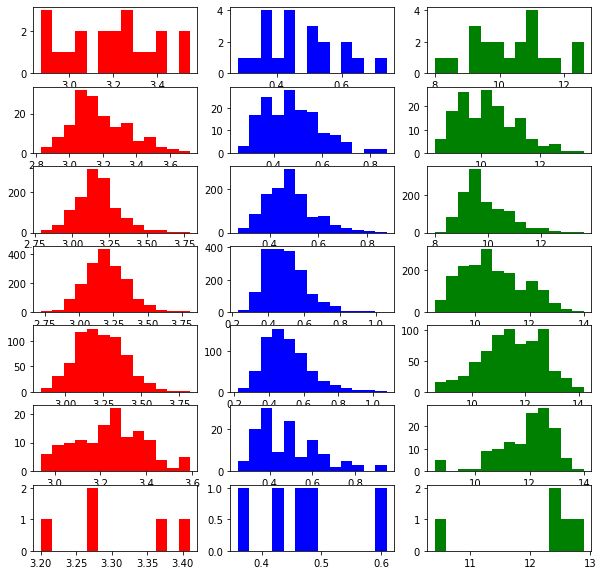

In [8]:
fig, axs = plt.subplots(7, 3, figsize=(10, 10))
mask = data[:, -1] == 3 
axs[0,0].hist(data[mask, 8], bins=13, color = 'red' ) 
axs[0,1].hist(data[mask, 9], bins=13, color = 'blue' )
axs[0,2].hist(data[mask, 10], bins=13, color = 'green')

mask = data[:, -1] == 4
axs[1,0].hist(data[mask, 8], bins=13, color = 'red' ) 
axs[1,1].hist(data[mask, 9], bins=13, color = 'blue' ) 
axs[1,2].hist(data[mask, 10], bins=13 , color = 'green') 

mask = data[:, -1] == 5 
axs[2,0].hist(data[mask, 8], bins=13, color = 'red' ) 
axs[2,1].hist(data[mask, 9], bins=13, color = 'blue' ) 
axs[2,2].hist(data[mask, 10], bins=13 , color = 'green') 

mask = data[:, -1] == 6 
axs[3,0].hist(data[mask, 8], bins=13, color = 'red' ) 
axs[3,1].hist(data[mask, 9], bins=13, color = 'blue' )
axs[3,2].hist(data[mask, 10], bins=13, color = 'green')

mask = data[:, -1] == 7 
axs[4,0].hist(data[mask, 8], bins=13, color = 'red' ) 
axs[4,1].hist(data[mask, 9], bins=13, color = 'blue' ) 
axs[4,2].hist(data[mask, 10], bins=13 , color = 'green') 

mask = data[:, -1] == 8 
axs[5,0].hist(data[mask, 8], bins=13, color = 'red' ) 
axs[5,1].hist(data[mask, 9], bins=13, color = 'blue' ) 
axs[5,2].hist(data[mask, 10], bins=13 , color = 'green') 

mask = data[:, -1] == 9 
axs[6,0].hist(data[mask, 8], bins=13, color = 'red' ) 
axs[6,1].hist(data[mask, 9], bins=13, color = 'blue' ) 
axs[6,2].hist(data[mask, 10], bins=13 , color = 'green') 


0
3.0
1
4.0
2
5.0
3
6.0
4
7.0
5
8.0
6
9.0


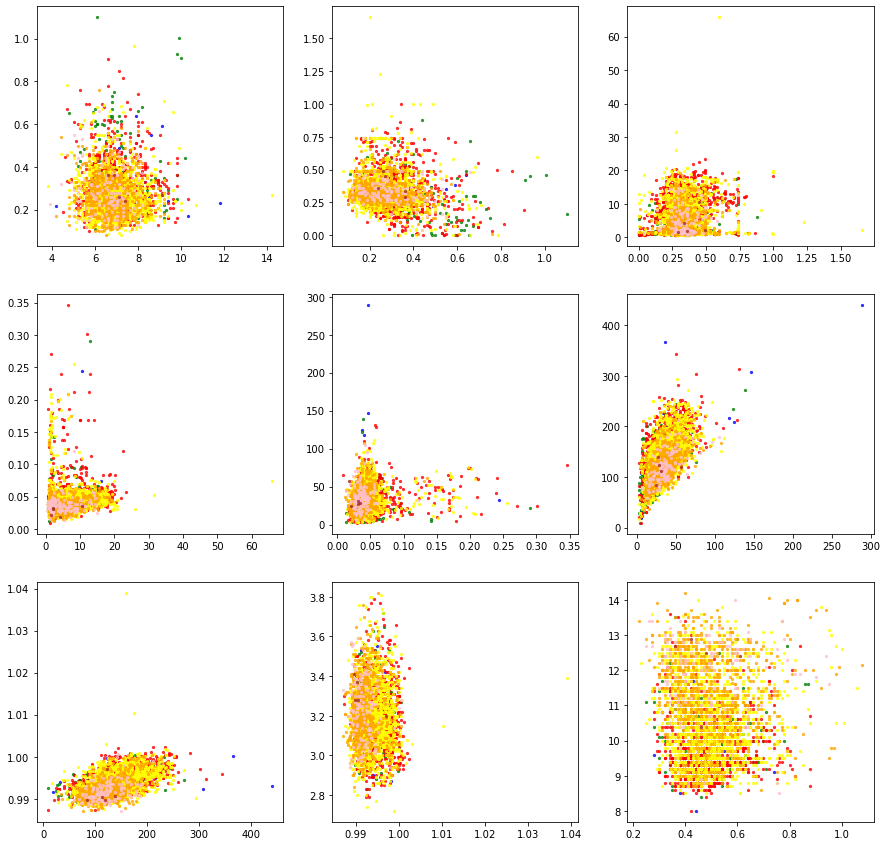

In [9]:
colors = ['blue', 'green', 'red', 'Yellow', 'Orange', 'Pink', 'brown']
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
a = [3, 4, 5]

for i, c in enumerate(np.unique(data[:, -1])): 
    print(i)
    print(c)
    mask = data[:, -1] == c # Finding the right points
    axs[0,0].scatter(data[mask, 0], data[mask, 1], s=5, color=colors[i], alpha=0.75)
    axs[0,1].scatter(data[mask, 1], data[mask, 2], s=5, color=colors[i], alpha=0.75)
    axs[0,2].scatter(data[mask, 2], data[mask, 3], s=5, color=colors[i], alpha=0.75)
    axs[1,0].scatter(data[mask, 3], data[mask, 4], s=5, color=colors[i], alpha=0.75)
    axs[1,1].scatter(data[mask, 4], data[mask, 5], s=5, color=colors[i], alpha=0.75)
    axs[1,2].scatter(data[mask, 5], data[mask, 6], s=5, color=colors[i], alpha=0.75)
    axs[2,0].scatter(data[mask, 6], data[mask, 7], s=5, color=colors[i], alpha=0.75)
    axs[2,1].scatter(data[mask, 7], data[mask, 8], s=5, color=colors[i], alpha=0.75)
    axs[2,2].scatter(data[mask, 9], data[mask, 10],s=5, color=colors[i], alpha=0.75)

In [10]:
#data.T.plot(kind='bar')

0
3.0
1
4.0
2
5.0
3
6.0
4
7.0
5
8.0
6
9.0


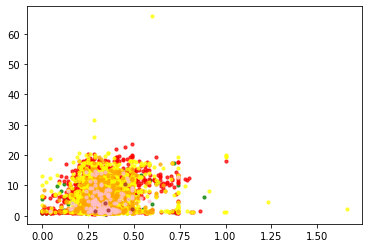

In [11]:
colors = ['blue', 'green', 'red', 'Yellow', 'Orange', 'Pink', 'brown'] #Taking an array of colors
for i, c in enumerate(np.unique(data[:, -1])): 
    print(i)
    print(c)
    mask = data[:, -1] == c # Finding the right points
    plt.scatter(data[mask, 2], data[mask, 3], s=10, color=colors[i], alpha=0.75)

In [12]:
wine = df.values
X = wine[:,0:-1]
Y = wine[:,-1]
X,Y = ml.shuffleData(X,Y)

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.8)
XtS, params = ml.rescale(Xtr) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features
# print(set(Y))
# nn = ml.nnet.nnetClassify()
# # nn.init_weights([XtS.shape[1], 5, 7], 'random', XtS, Ytr) # as many layers nodes you want
# # nn.train(XtS, Ytr, stopTol=1e-8, stepsize=.25, stopIter=300)

# layers = [1, 2, 4, 6]
# nodes = [5, 10, 25, 50, 100]
# tr_auc = np.zeros((len(layers),len(nodes)))
# va_auc = np.zeros((len(layers),len(nodes)))
# for i, layer in enumerate(layers): 
#     for j, node in enumerate(nodes):
#         layerNodes = layer*[node]
#         nn.init_weights([XtS.shape[1]] + layerNodes + [7], 'random', XtS, Ytr) 
#         nn.train(XtS, Ytr, stopTol=1e-8, stepsize=.25, stopIter=300) 
#         tr_auc[i][j] = nn.err(XtS, Ytr)
#         va_auc[i][j] = nn.err(XvS, Yva)

In [13]:
# # Now plot it
# f, ax = plt.subplots(1, 1, figsize=(8, 5))
# cax = ax.matshow(tr_auc, interpolation='nearest') 
# f.colorbar(cax)
# ax.set_xticklabels(['']+nodes) 
# ax.set_yticklabels(['']+layers)
# plt.show()

In [14]:
# # Now plot it
# f, ax = plt.subplots(1, 1, figsize=(8, 5))
# cax = ax.matshow(va_auc, interpolation='nearest') 
# f.colorbar(cax)
# ax.set_xticklabels(['']+nodes) 
# ax.set_yticklabels(['']+layers)
# plt.show()

In [15]:
# print(tr_auc)

In [16]:
# print(va_auc)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

learner = RandomForestClassifier(n_estimators=100)

learner.fit(XtS, Ytr)

tr_pred = learner.predict(XtS)
predictions = learner.predict(XvS)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

Training Accuracy: 1.0
Testing Accuracy: 0.5467171717171717


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

learner = RandomForestClassifier(n_estimators=105, max_depth=180, max_features=9)

learner.fit(XtS, Ytr)

tr_pred = learner.predict(XtS)
predictions = learner.predict(XvS)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

Training Accuracy: 1.0
Testing Accuracy: 0.5441919191919192


In [19]:
Ytr

array([5., 4., 5., ..., 6., 6., 7.])

In [20]:
df.columns.values.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [21]:
import pandas as pd
feature_imp = pd.Series(learner.feature_importances_,index=df.columns.values.tolist()[:-1]).sort_values(ascending=False)
feature_imp

alcohol                 0.137586
free sulfur dioxide     0.101277
volatile acidity        0.101205
density                 0.090739
total sulfur dioxide    0.088516
pH                      0.085941
chlorides               0.083453
residual sugar          0.080602
sulphates               0.080380
citric acid             0.078182
fixed acidity           0.072118
dtype: float64

No handles with labels found to put in legend.


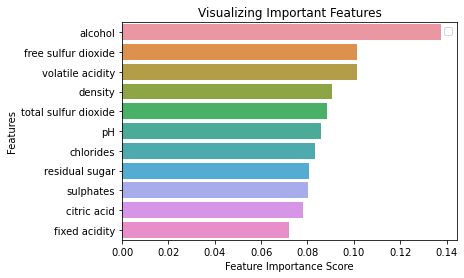

In [22]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [23]:
from sklearn.neural_network import MLPClassifier

learner = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.05, learning_rate="adaptive", activation='tanh', solver='adam', max_iter=500)

learner.fit(XtS, Ytr)

tr_pred = learner.predict(XtS)
predictions = learner.predict(XvS)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

Training Accuracy: 0.6607762701167561
Testing Accuracy: 0.5113636363636364


/Users/michael/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
import tensorflow as tf

learner = tf.keras.models.Sequential()
learner.add(tf.keras.layers.Dense(units=6, activation='relu'))
learner.add(tf.keras.layers.Dense(units=6, activation='relu'))
learner.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
learner.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

learner.fit(XtS, Ytr, batch_size = 32, epochs = 100)

tr_pred = learner.predict(XtS)
predictions = learner.predict(XvS)

print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

Epoch 1/100


2022-03-21 14:35:21.489862: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


100/100 [==============================] - 1s 954us/step - loss: 0.8820 - accuracy: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 0s 839us/step - loss: -2.0835 - accuracy: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 0s 740us/step - loss: -8.3492 - accuracy: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 0s 709us/step - loss: -24.2384 - accuracy: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 0s 722us/step - loss: -57.7860 - accuracy: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 0s 717us/step - loss: -118.6311 - accuracy: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 0s 721us/step - loss: -223.2996 - accuracy: 0.0000e+00
Epoch 8/100
100/100 [==============================] - 0s 705us/step - loss: -385.0372 - accuracy: 0.0000e+00
Epoch 9/100
100/100 [==============================] - 0s 719us/step - loss: -608.7902 - accuracy: 0.0000e+00
Epoch 10/100
100/100 [=========

100/100 [==============================] - 0s 835us/step - loss: -247761.4688 - accuracy: 0.0000e+00
Epoch 75/100
100/100 [==============================] - 0s 828us/step - loss: -256185.7969 - accuracy: 0.0000e+00
Epoch 76/100
100/100 [==============================] - 0s 900us/step - loss: -264795.6562 - accuracy: 0.0000e+00
Epoch 77/100
100/100 [==============================] - 0s 848us/step - loss: -273577.6562 - accuracy: 0.0000e+00
Epoch 78/100
100/100 [==============================] - 0s 842us/step - loss: -282486.9688 - accuracy: 0.0000e+00
Epoch 79/100
100/100 [==============================] - 0s 823us/step - loss: -291569.9688 - accuracy: 0.0000e+00
Epoch 80/100
100/100 [==============================] - 0s 839us/step - loss: -300809.0000 - accuracy: 0.0000e+00
Epoch 81/100
100/100 [==============================] - 0s 3ms/step - loss: -310292.5000 - accuracy: 0.0000e+00
Epoch 82/100
100/100 [==============================] - 0s 2ms/step - loss: -319915.1250 - accuracy: 0.

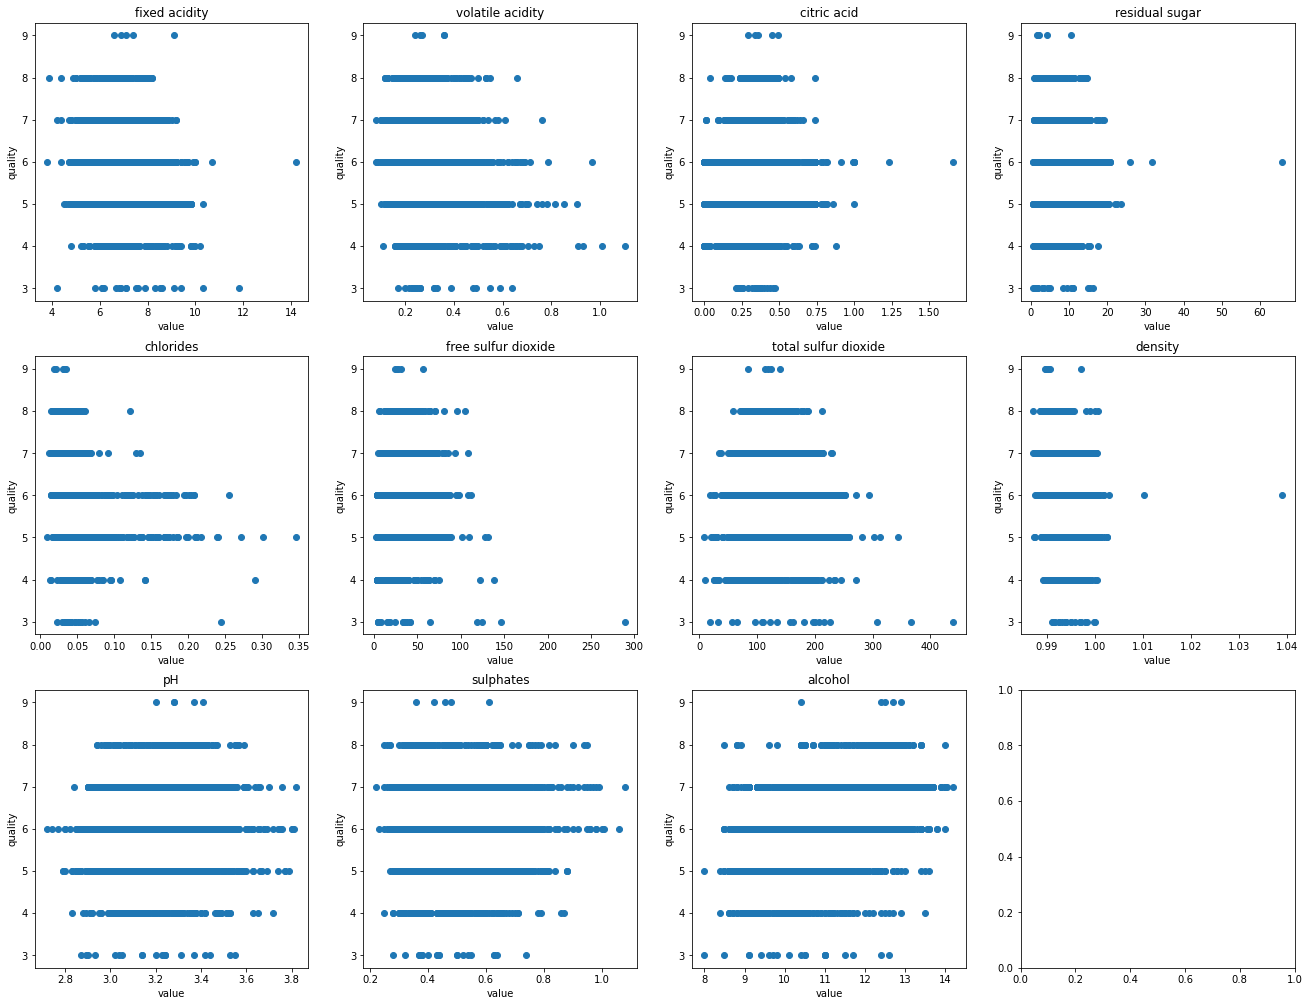

In [80]:
# Plotting single feature vs class labels
featureList = df.columns.values.tolist()
wine = df.values
X = wine[:,0:-1]
Y = wine[:,-1]
# for feature in range(11):
#     plt.scatter(X[:,feature], Y)
#     plt.title(featureList[feature])
#     plt.show()
    
fig, axs = plt.subplots(3,4, figsize=(20,15))
index = 0
allFeatures = featureList + ["quality"]
for feature in range(11):
    if 0 <= feature <= 3:
        index = 0
    elif 4 <= feature <= 7:
        index = 1
    else: 
        index = 2
    axs[index, feature%4].scatter(X[:,feature], Y)
    axs[index, feature%4].title.set_text(featureList[feature])
    axs[index, feature%4].set_xlabel('value')
    axs[index, feature%4].set_ylabel("quality")
plt.subplots_adjust(top=1, right=1)
plt.show()    
    

14
1
1
65
0
289
440
1
3
1
14
9


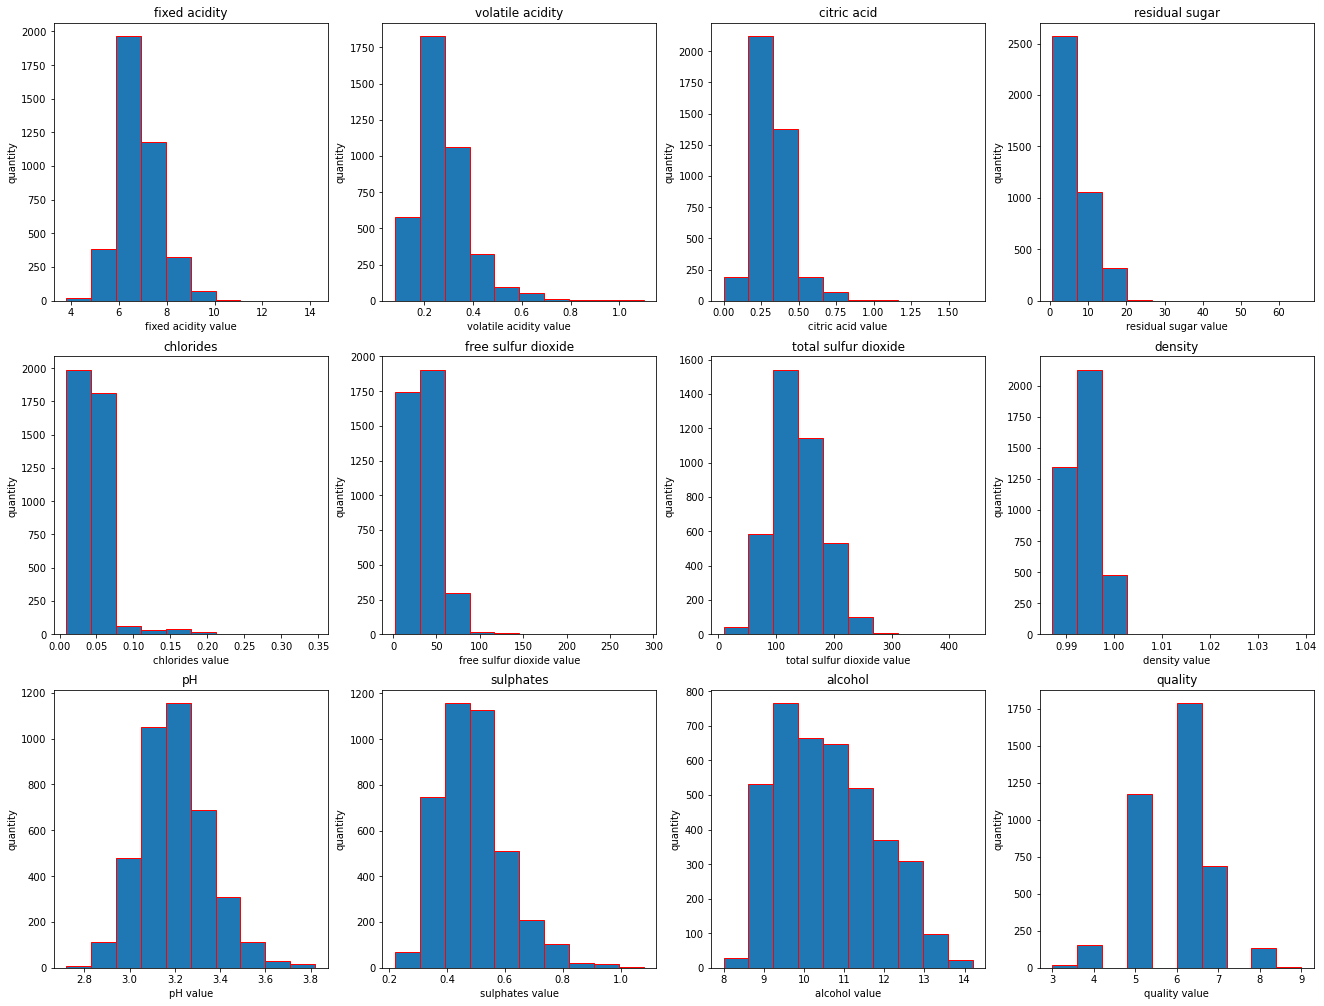

In [77]:
# Binning features against class labels
fig, axs = plt.subplots(3,4, figsize=(20,15))
index = 0
allFeatures = featureList + ["quality"]
for feature in range(12):
    if 0 <= feature <= 3:
        index = 0
    elif 4 <= feature <= 7:
        index = 1
    else: 
        index = 2
    print(int(max(df.values[:,feature])))
    axs[index, feature %4].hist(df.values[:,feature], edgecolor='red')
    axs[index, feature%4].title.set_text(featureList[feature])
    axs[index, feature%4].set_xlabel(featureList[feature] + ' value')
    axs[index, feature%4].set_ylabel("quantity")
plt.subplots_adjust(top=1, right=1)
plt.show()    
    

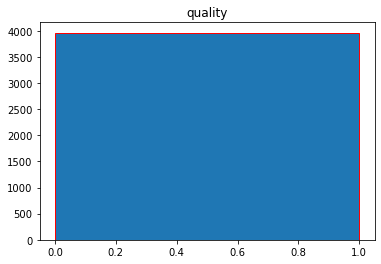

In [60]:
# Binning class label quantity
plt.hist(Y, bins=int(max(Y)), edgecolor='red')
plt.title("quality")
plt.show()

In [28]:
# Checking if duplicates exist (can ignore)

t = df.copy()
t = t.drop_duplicates()
t

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [29]:
# Statistics on each feature

for f in range(11):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print(f"Feature {featureList[f]}")
    print(f"\tMin: {np.min(X[:,f])}")
    print(f"\tMax: {np.max(X[:,f])}")
    print(f"\tMean: {np.mean(X[:,f])}")
    print(f"\tVariance: {np.var(X[:,f])}")
    print(f"\tStandard Deviation: {np.std(X[:,f])}")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature fixed acidity
	Min: 3.8
	Max: 14.2
	Mean: 6.8393461247159815
	Variance: 0.7512560985768781
	Standard Deviation: 0.8667503092453317
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature volatile acidity
	Min: 0.08
	Max: 1.1
	Mean: 0.2805377429941934
	Variance: 0.010696529817576968
	Standard Deviation: 0.10342402920780532
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature citric acid
	Min: 0.0
	Max: 1.66
	Mean: 0.3343322393335017
	Variance: 0.014989259978045219
	Standard Deviation: 0.1224306333318799
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature residual sugar
	Min: 0.6
	Max: 65.8
	Mean: 5.914819490027772
	Variance: 23.629637741968033
	Standard Deviation: 4.861032579809359
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Feature chlorides
	Min: 0.009
	Max: 0.346
	Mean: 0.0459050744761424
	Variance: 0.0005336006836665059
	Standard Deviation: 0.023099798346879693
~~~~~~~~~~~~~~~~~~~~~~

In [30]:
# Statistics on class labels

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(f"Wine quality {featureList[f]}")
print(f"\tMin: {np.min(Y)}")
print(f"\tMax: {np.max(Y)}")
print(f"\tMean: {np.mean(Y)}")
print(f"\tVariance: {np.var(Y)}")
print(f"\tStandard Deviation: {np.std(Y)}")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Wine quality alcohol
	Min: 3.0
	Max: 9.0
	Mean: 5.854834637717748
	Variance: 0.7931153538721799
	Standard Deviation: 0.8905702408413274
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [31]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [32]:
# dropping features

df_1 = df.drop(columns=["fixed acidity","citric acid","sulphates"])

wine = df_1.values
X = wine[:,0:-1]
Y = wine[:,-1]
X,Y = ml.shuffleData(X,Y)

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.8)
XtS, params = ml.rescale(Xtr) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

In [33]:
learner = RandomForestClassifier(n_estimators=100)

learner.fit(XtS, Ytr)

tr_pred = learner.predict(XtS)
predictions = learner.predict(XvS)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

Training Accuracy: 1.0
Testing Accuracy: 0.5517676767676768


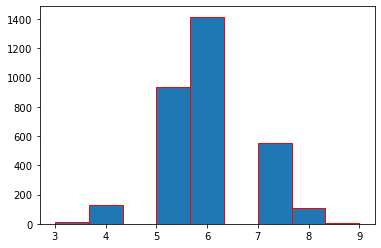

In [34]:
plt.hist(Ytr, bins=int(max(Ytr)), edgecolor='red')
plt.show()

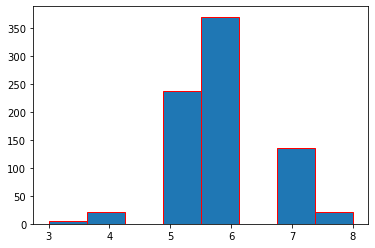

In [35]:
plt.hist(Yva, bins=int(max(Yva)), edgecolor='red')
plt.show()

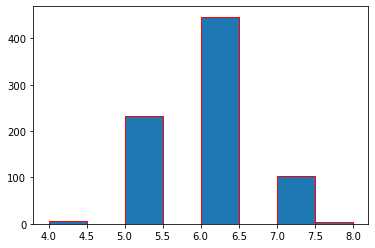

In [36]:
plt.hist(predictions, bins=int(max(predictions)), edgecolor='red')
plt.show()

In [37]:
tr_error = 10 * [0]
va_error = 10 *[0]

for threshold in range(0, 10):
    wine = df.values
    X = wine[:,0:-1]
    Y = wine[:,-1]

    # Converting multi class to binary
    for i in range(len(Y)):
        if Y[i] >= threshold:
            Y[i] = 1
        else:
            Y[i] = 0

    X,Y = ml.shuffleData(X,Y)

    Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.8)
    XtS, params = ml.rescale(Xtr) # Normalize the features
    XvS, _ = ml.rescale(Xva, params) # Normalize the features

    learner = RandomForestClassifier(n_estimators=100)

    learner.fit(XtS, Ytr)

    tr_pred = learner.predict(XtS)
    predictions = learner.predict(XvS)
    print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
    print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))
    
    tr_error[threshold] = sum(a==b for a,b in zip(Ytr, tr_pred))
    va_error[threshold] = sum(a == b for a,b in zip(Yva, predictions))
    
print(tr_error)
print(va_error)
print(len(predictions))

# pick 7 as threshold

Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Accuracy: 1.0
Testing Accuracy: 0.9962121212121212
Training Accuracy: 1.0
Testing Accuracy: 0.9545454545454546
Training Accuracy: 1.0
Testing Accuracy: 0.7765151515151515
Training Accuracy: 1.0
Testing Accuracy: 0.8282828282828283
Training Accuracy: 1.0
Testing Accuracy: 0.9709595959595959
Training Accuracy: 1.0
Testing Accuracy: 1.0
[3169, 3169, 3169, 3169, 3169, 3169, 3169, 3169, 3169, 3169]
[792, 792, 792, 792, 789, 756, 615, 656, 769, 792]
792


In [38]:
# binary classification w/ threshold 7 without lowest 3 features

# dropped features
wine = df_1.values
X = wine[:,0:-1]
Y = wine[:,-1]

# Converting multi class to binary
for i in range(len(Y)):
    if Y[i] >= 7:
        Y[i] = 1
    else:
        Y[i] = 0

X,Y = ml.shuffleData(X,Y)

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.8)
XtS, params = ml.rescale(Xtr) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

learner = RandomForestClassifier(n_estimators=100)

learner.fit(XtS, Ytr)

tr_pred = learner.predict(XtS)
predictions = learner.predict(XvS)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

Training Accuracy: 1.0
Testing Accuracy: 0.8282828282828283


In [49]:
# cv 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

wine = df.values
X = wine[:,0:-1]
Y = wine[:,-1]

# Converting multi class to binary
for i in range(len(Y)):
    if Y[i] >= 7:
        Y[i] = 1
    else:
        Y[i] = 0

X,Y = ml.shuffleData(X,Y)

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.8)
XtS, params = ml.rescale(Xtr) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features


model = RandomForestClassifier()
for splits in range(2,10):
    cv = RepeatedStratifiedKFold(n_splits=splits, n_repeats=3, random_state=1)

    n_scores = cross_val_score(model, XtS,Ytr, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    # report performance
    print(f"Split {splits}")
    print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Split 2
Accuracy: 0.821 (0.005)
Split 3
Accuracy: 0.824 (0.009)
Split 4
Accuracy: 0.828 (0.010)
Split 5
Accuracy: 0.827 (0.010)
Split 6
Accuracy: 0.827 (0.011)
Split 7
Accuracy: 0.826 (0.009)


KeyboardInterrupt: 

In [40]:
from sklearn.neural_network import MLPClassifier

learner = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.05, learning_rate="adaptive", activation='tanh', solver='adam', max_iter=500)

learner.fit(XtS, Ytr)

tr_pred = learner.predict(XtS)
predictions = learner.predict(XvS)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

Training Accuracy: 0.8605238245503314
Testing Accuracy: 0.8295454545454546


/Users/michael/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
learner = RandomForestClassifier(n_estimators=105, max_depth=75, max_features=2)

learner.fit(XtS, Ytr)

tr_pred = learner.predict(XtS)
predictions = learner.predict(XvS)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

Training Accuracy: 1.0
Testing Accuracy: 0.8434343434343434


In [42]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(learner, parameter_space, n_jobs=-1, cv=3)
clf.fit(XtS, Ytr)

print('Best parameters found:\n', clf.best_params_)

ValueError: Invalid parameter activation for estimator RandomForestClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [53]:
import tensorflow as tf

learner = tf.keras.models.Sequential()
learner.add(tf.keras.layers.Dense(units=100, activation='tanh'))
learner.add(tf.keras.layers.Dense(units=100, activation='tanh'))
learner.add(tf.keras.layers.Dense(units=1, activation='tanh'))
learner.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

learner.fit(XtS, Ytr, batch_size = 32, epochs = 100)

tr_pred = learner.predict(XtS)
predictions = learner.predict(XvS)


# convert values to binary (float -> 1/0)
tr_pred = [1 if val >= 0.5 else 0 for val in tr_pred]
predictions = [1 if val >= 0.5 else 0 for val in predictions]

print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

score = learner.evaluate(Xva, Yva, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 0.9119 - accuracy: 0.7722
Epoch 2/100
100/100 [==============================] - 0s 974us/step - loss: 0.7099 - accuracy: 0.7782
Epoch 3/100
100/100 [==============================] - 0s 1ms/step - loss: 0.8281 - accuracy: 0.7510
Epoch 4/100
100/100 [==============================] - 0s 1ms/step - loss: 1.1618 - accuracy: 0.6683
Epoch 5/100
100/100 [==============================] - 0s 963us/step - loss: 0.6896 - accuracy: 0.7428
Epoch 6/100
100/100 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.7412
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 0.7284 - accuracy: 0.7245
Epoch 8/100
100/100 [==============================] - 0s 1ms/step - loss: 0.5772 - accuracy: 0.7352
Epoch 9/100
100/100 [==============================] - 0s 1ms/step - loss: 0.5105 - accuracy: 0.8126
Epoch 10/100
100/100 [==============================] - 0s 1ms/step - loss: 0.6481 - ac

100/100 [==============================] - 0s 1ms/step - loss: 0.8628 - accuracy: 0.6175
Epoch 82/100
100/100 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.6999
Epoch 83/100
100/100 [==============================] - 0s 1ms/step - loss: 0.5286 - accuracy: 0.7927
Epoch 84/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.8145
Epoch 85/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8258
Epoch 86/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8236
Epoch 87/100
100/100 [==============================] - 0s 970us/step - loss: 0.4301 - accuracy: 0.8186
Epoch 88/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8186
Epoch 89/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8239
Epoch 90/100
100/100 [==============================] - 0s 987us/step - loss: 0.4213 - accura

In [ ]:
learner.summary()

In [91]:
from sdv.tabular import GaussianCopula
from sdv.evaluation import evaluate

model = GaussianCopula()
model.fit(df)

sample = model.sample(4000)

evaluate(sample, df, metrics=['CSTest', 'KSTest'], aggregate=False)

/Users/michael/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/michael/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/michael/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:615: RuntimeWarning: divide by zero encountered in _beta_cdf
  return _boost._beta_cdf(x, a, b)
/Users/michael/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/michael/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = mu

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,CSTest,Chi-Squared,NaN,NaN,0.0,1.0,MAXIMIZE,"Cannot find fields of types ('boolean', 'categ..."
1,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.952403,0.952403,0.0,1.0,MAXIMIZE,None


In [ ]:
sample.head()

In [ ]:
df.head()

In [ ]:
type(sample)

In [ ]:
sample.describe()

In [ ]:
df.describe()

In [ ]:
# Using SDV to generate fake data that resembles wine
combinedDF = pd.concat([df,sample])
wine = combinedDF.values
X = wine[:,0:-1]
Y = wine[:,-1]
X,Y = ml.shuffleData(X,Y)

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.8)
XtS, params = ml.rescale(Xtr) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

learner = RandomForestClassifier(n_estimators=100)

learner.fit(XtS, Ytr)

tr_pred = learner.predict(XtS)
predictions = learner.predict(XvS)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

In [ ]:
wine = combinedDF.values
X = wine[:,0:-1]
Y = wine[:,-1]

# Converting multi class to binary
for i in range(len(Y)):
    if Y[i] >= 7:
        Y[i] = 1
    else:
        Y[i] = 0

X,Y = ml.shuffleData(X,Y)

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.8)
XtS, params = ml.rescale(Xtr) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

learner = RandomForestClassifier(n_estimators=100)

learner.fit(XtS, Ytr)

tr_pred = learner.predict(XtS)
predictions = learner.predict(XvS)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

In [ ]:
asjfhdjkash = pd.read_csv (r'data/winequality-white.csv', delimiter = ";")


In [90]:
df.isnull()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
for i in Y:
    if type(i) is not int or type(i) is not float:
        print(type(i))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl